# Figure6 panel 3

Increase in inclusion index default golden tool -> tuned zinbra.

In [1]:
import downstream.bed_metrics as bm
import downstream.loci_of_interest as loi

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

df = pd.read_csv('/mnt/stripe/bio/experiments/figures/Peak Calling Summary - aging.tsv', sep='\t')
df = df.loc[df['Status'] != 'Failed'][['donor', 'modification', 'tool', 'peaks', 'procedure', 'file']]
display(df.columns)

Index(['donor', 'modification', 'tool', 'peaks', 'procedure', 'file'], dtype='object')

In [3]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from collections import OrderedDict, Counter

toshow = OrderedDict([
    ("H3K27ac", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K27me3", [("MACS2", "default"), ("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K36me3", [("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me1", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me3", [("MACS2", "default"), ("ZINBRA", "tuned")])
])


bigdf = pd.DataFrame(columns=['id', 'modification', 'tool', 'procedure', 'inclusion'])
xlabels = []
for m, tps in toshow.items():
    for (tool, procedure) in tps:
        xlabels.append(tool)
        files = df.loc[np.logical_and(df['tool'] == tool, 
                          np.logical_and(df['modification'] == m, 
                                         df['procedure'] == procedure))]['file']
        paths = [Path(f) for f in files]
        df_path = '/mnt/stripe/bio/experiments/figures/peak_{}_{}_{}.tsv'.format(m, tool, procedure)
        mt = bm.load_or_build_metrics_table(paths, paths, Path(df_path),
                                            jaccard=False,
                                            threads=30)
        for r in mt.index:
            for c in mt.columns:
                inclusion = mt.loc[r][c]
                bigdf.loc[len(bigdf)] = (r + "@" + c, m, tool, procedure, inclusion)

[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K27ac_MACS2_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K27ac_ZINBRA_tuned.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K27me3_MACS2_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K27me3_SICER_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K27me3_ZINBRA_tuned.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K36me3_SICER_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K36me3_ZINBRA_tuned.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K4me1_MACS2_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K4me1_ZINBRA_tuned.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3K4me3_MACS2_default.tsv
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/peak_H3

In [4]:
def plot_bars(dft, xlabels):
    dft['mp'] = dft['modification'] + " " + dft['tool'] + " " + dft['procedure']
    dft = dft[['id', 'mp', 'tool', 'inclusion']]
    
    fig = plt.figure(figsize=(int(len(set(dft['mp'])) * 0.75), 5))
    sns.set_style("whitegrid")

    encode_palette={"aging": "blue", "encode": "red"}
    dft["type"] = "aging"

    dft.loc[["encode" in str(v) for v in dft["id"]], "type"] = "encode"


    ax = sns.barplot(data=dft, 
             x="mp", y="inclusion",
             ci="sd", capsize=.2, errwidth=2,
             color="lightgray",
             edgecolor="black")

    # ax = sns.violinplot(data=dft, x="mp", y="inclusion", inner=None)
    ax = sns.swarmplot(data=dft, 
                       x="mp", y="inclusion",
                       size=2, alpha=.5,
                       hue = "type",
                       palette=encode_palette,)


    plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)
    plt.xlabel('')

    fig.text(.15, -.05, 'H3K27ac')
    fig.text(.33, -.05, 'H3K27me3')
    fig.text(.50, -.05, 'H3K36me3')
    fig.text(.645, -.05, 'H3K4me1')
    fig.text(.785, -.05, 'H3K4me3')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()
    plt.close()

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


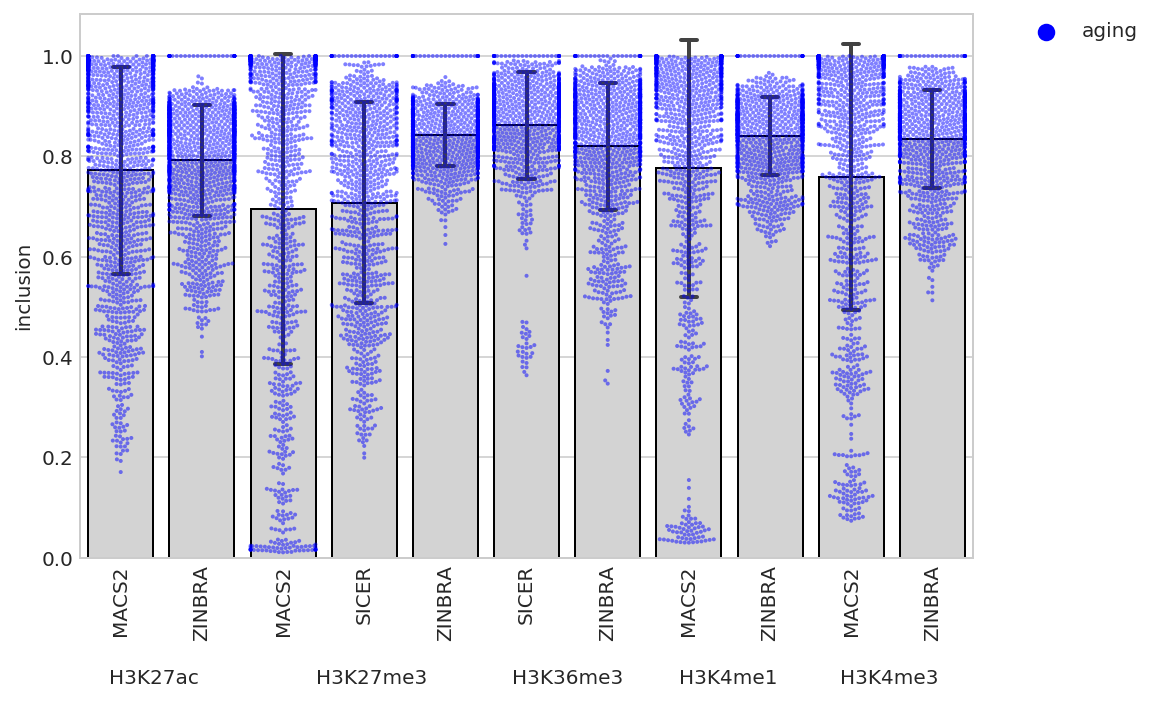

In [5]:
plot_bars(bigdf, xlabels)

# Add inclusion index with ENCODE default (MACS2)

In [6]:
dfe = pd.read_csv('/mnt/stripe/bio/experiments/figures/Peak Calling Summary - encode.tsv', sep='\t')
dfe = dfe[['donor', 'modification', 'tool', 'peaks', 'procedure', 'file']]
dfe = dfe.loc[np.logical_and(dfe['tool'] == 'MACS2', dfe['procedure'] == 'default')]
display(dfe)

,donor,modification,tool,peaks,procedure,file
0,GSM1003559,H3K27ac,MACS2,48977,default,/mnt/stripe/bio/experiments/configs/benchmark_...
4,GSM1102782,H3K27ac,MACS2,25731,default,/mnt/stripe/bio/experiments/configs/benchmark_...
8,GSM1003564,H3K27me3,MACS2,26417,default,/mnt/stripe/bio/experiments/configs/benchmark_...
14,GSM1102785,H3K27me3,MACS2,14948,default,/mnt/stripe/bio/experiments/configs/benchmark_...
20,GSM945301,H3K27me3,MACS2,8547,default,/mnt/stripe/bio/experiments/configs/benchmark_...
26,GSM1003562,H3K36me3,MACS2,36075,default,/mnt/stripe/bio/experiments/configs/benchmark_...
32,GSM1102788,H3K36me3,MACS2,33969,default,/mnt/stripe/bio/experiments/configs/benchmark_...
38,GSM1003535,H3K4me1,MACS2,63724,default,/mnt/stripe/bio/experiments/configs/benchmark_...
42,GSM1102793,H3K4me1,MACS2,64752,default,/mnt/stripe/bio/experiments/configs/benchmark_...
46,GSM1003536,H3K4me3,MACS2,39589,default,/mnt/stripe/bio/experiments/configs/benchmark_...


In [7]:
import os
from scripts.util import run

method = 'union'
encode_macs2_peaks = {}
for modification in set(dfe['modification']):
    result_file = '/mnt/stripe/bio/experiments/figures/{}_encode_{}.bed'.format(modification, method)
    if not os.path.exists(result_file):
        files = list(dfe.loc[dfe['modification'] == modification]['file'])
        cmd = ['bash', '/mnt/stripe/washu/bed/{}.sh'.format(method)] + files
        with open(result_file, mode='w') as out:
            run([cmd], stdout=out)
    encode_macs2_peaks[modification] = result_file
display(encode_macs2_peaks)

{'H3K27ac': '/mnt/stripe/bio/experiments/figures/H3K27ac_encode_union.bed',
 'H3K27me3': '/mnt/stripe/bio/experiments/figures/H3K27me3_encode_union.bed',
 'H3K36me3': '/mnt/stripe/bio/experiments/figures/H3K36me3_encode_union.bed',
 'H3K4me1': '/mnt/stripe/bio/experiments/figures/H3K4me1_encode_union.bed',
 'H3K4me3': '/mnt/stripe/bio/experiments/figures/H3K4me3_encode_union.bed'}

H3K27ac MACS2 default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K27ac_MACS2_default.tsv
H3K27ac ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K27ac_ZINBRA_tuned.tsv
H3K27me3 MACS2 default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K27me3_MACS2_default.tsv
H3K27me3 SICER default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K27me3_SICER_default.tsv
H3K27me3 ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K27me3_ZINBRA_tuned.tsv
H3K36me3 SICER default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K36me3_SICER_default.tsv
H3K36me3 ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_union_H3K36me3_ZINBRA_tuned.tsv
H3K4me1 MACS2 default
[Skipped]: Already exists /mnt/stripe/bio/e

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


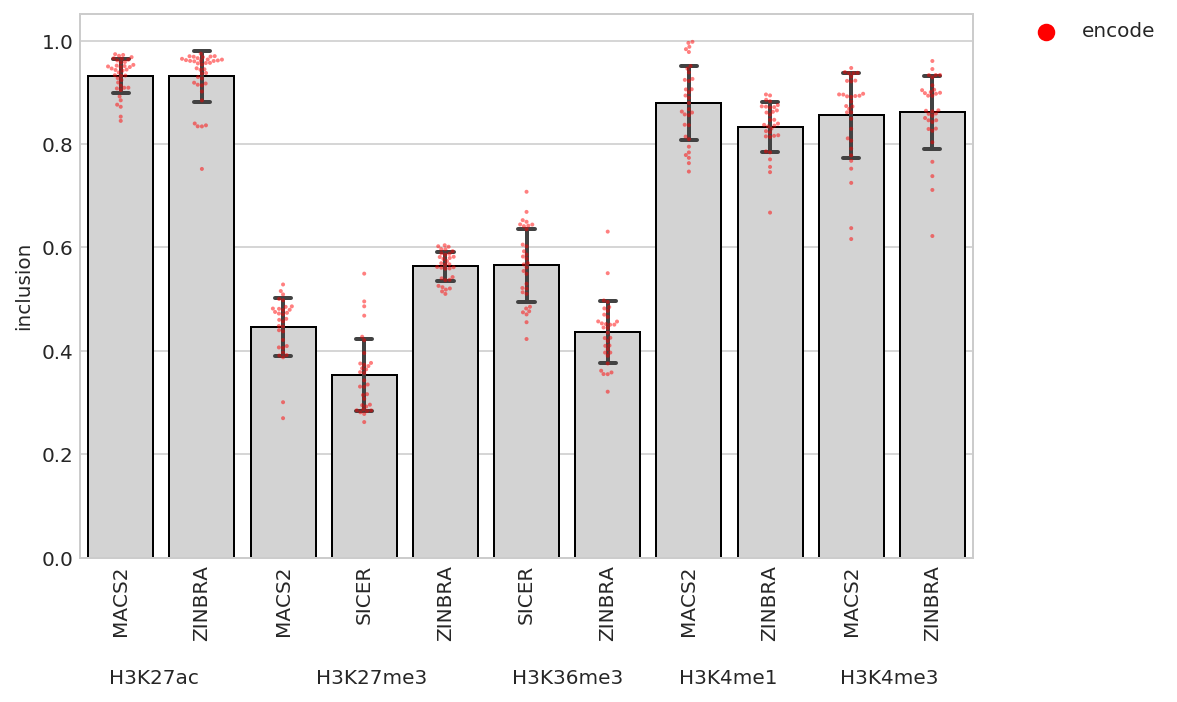

In [8]:
bigdf = pd.DataFrame(columns=['id', 'modification', 'tool', 'procedure', 'inclusion'])
xlabels = []
for m, tps in toshow.items():
    for (tool, procedure) in tps:
        xlabels.append(tool)
        print(m, tool, procedure)
        files = df.loc[np.logical_and(df['tool'] == tool, 
                          np.logical_and(df['modification'] == m, 
                                         df['procedure'] == procedure))]['file']
        paths = [Path(f) for f in files]
#         df_path = '/mnt/stripe/bio/experiments/figures/peak_{}_{}_{}.tsv'.format(m, tool, procedure)
#         mt = bm.load_or_build_metrics_table(paths, paths, Path(df_path),
#                                             jaccard=False,
#                                             threads=30)
#         for r in mt.index:
#             for c in mt.columns:
#                 inclusion = mt.loc[r][c]
#                 bigdf.loc[len(bigdf)] = (r + "@" + c, m, tool, procedure, inclusion)

        # Add encode inclusion        
        dfe_path = '/mnt/stripe/bio/experiments/figures/inclusion_encode_{}_{}_{}_{}.tsv'\
        .format(method, m, tool, procedure)
        mte = bm.load_or_build_metrics_table(paths, [Path(encode_macs2_peaks[modification])], Path(dfe_path),
                                            jaccard=False,
                                            threads=30)  
        for r in mte.index:
            for c in mte.columns:
                inclusion = mte.loc[r][c]
                bigdf.loc[len(bigdf)] = ('encode' + r + "@" + c, m, tool, procedure, inclusion)

plot_bars(bigdf, xlabels)

# VS downloaded BED files

H3K27ac MACS2 default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K27ac_MACS2_default.tsv
H3K27ac ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K27ac_ZINBRA_tuned.tsv
H3K27me3 MACS2 default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K27me3_MACS2_default.tsv
H3K27me3 SICER default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K27me3_SICER_default.tsv
H3K27me3 ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K27me3_ZINBRA_tuned.tsv
H3K36me3 SICER default
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K36me3_SICER_default.tsv
H3K36me3 ZINBRA tuned
[Skipped]: Already exists /mnt/stripe/bio/experiments/figures/inclusion_encode_beds_union_H3K36me3_ZINBRA_tuned.tsv
H3K4me1 MACS2 default
[Skipped

/home/user/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


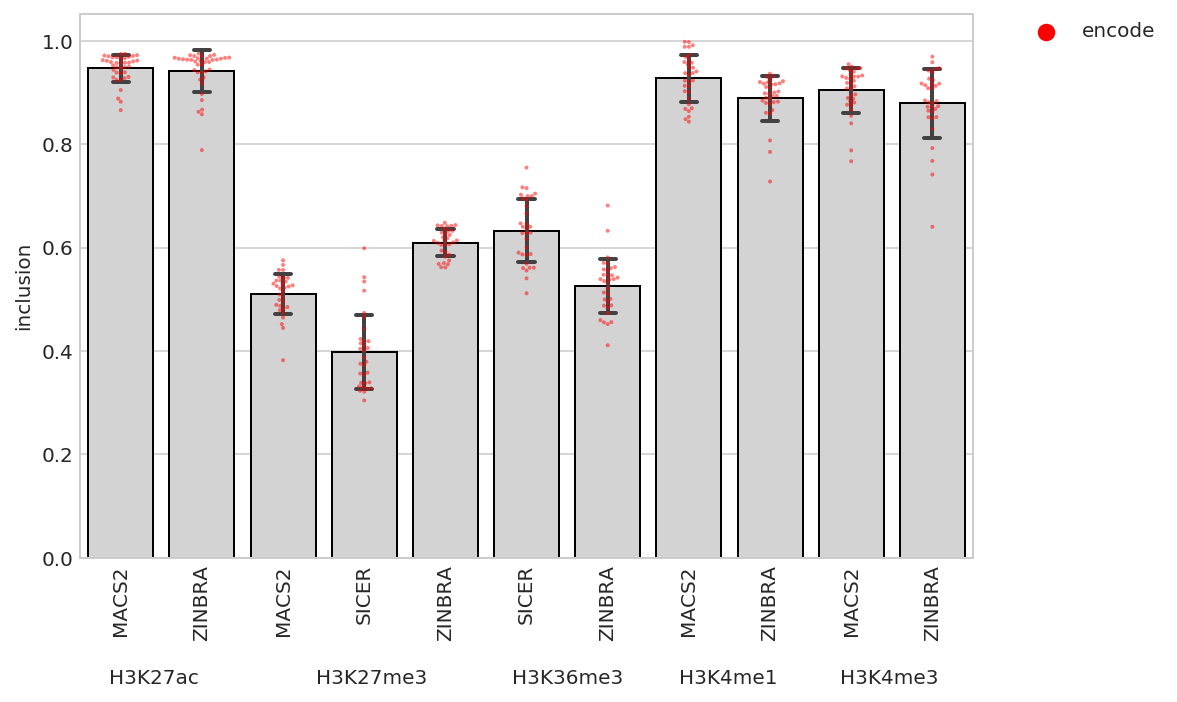

In [9]:
encode_macs2_peaks_beds={
    'H3K27ac': '/mnt/stripe/bio/experiments/figures/GSM1003559_hg19_wgEncodeBroadHistoneMonocd14ro1746H3k27acPk.broadPeak',
    'H3K27me3': '/mnt/stripe/bio/experiments/figures/GSM1003564_hg19_wgEncodeBroadHistoneMonocd14ro1746H3k27me3Pk.broadPeak',
    'H3K36me3': '/mnt/stripe/bio/experiments/figures/GSM1003562_hg19_wgEncodeBroadHistoneMonocd14ro1746H3k36me3Pk.broadPeak',
    'H3K4me1': '/mnt/stripe/bio/experiments/figures/GSM1003535_hg19_wgEncodeBroadHistoneMonocd14ro1746H3k04me1Pk.broadPeak',
    'H3K4me3': '/mnt/stripe/bio/experiments/figures/GSM1003536_hg19_wgEncodeBroadHistoneMonocd14ro1746H3k04me3Pk.broadPeak'
}

bigdf = pd.DataFrame(columns=['id', 'modification', 'tool', 'procedure', 'inclusion'])
xlabels = []
for m, tps in toshow.items():
    for (tool, procedure) in tps:
        xlabels.append(tool)
        print(m, tool, procedure)
        files = df.loc[np.logical_and(df['tool'] == tool, 
                          np.logical_and(df['modification'] == m, 
                                         df['procedure'] == procedure))]['file']
        paths = [Path(f) for f in files]
        # Add encode inclusion        
        dfe_path = '/mnt/stripe/bio/experiments/figures/inclusion_encode_beds_{}_{}_{}_{}.tsv'\
        .format(method, m, tool, procedure)
        mte = bm.load_or_build_metrics_table(paths, [Path(encode_macs2_peaks_beds[modification])], Path(dfe_path),
                                            jaccard=False,
                                            threads=30)  
        for r in mte.index:
            for c in mte.columns:
                inclusion = mte.loc[r][c]
                bigdf.loc[len(bigdf)] = ('encode' + r + "@" + c, m, tool, procedure, inclusion)

plot_bars(bigdf, xlabels)